IMPORTING LIBRARIES

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split


DATA ANALYSIS

In [76]:
data=pd.read_csv("GRIP_TASK1.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [77]:
print(data.shape)

(25, 2)


In [78]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [79]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [80]:
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [81]:
y=data.iloc[:, :-1].values
x=data.iloc[:, -1].values

CHECKING MISSING VALUES

In [82]:
print(np.isnan(data).sum())

Hours     0
Scores    0
dtype: int64


<Axes: >

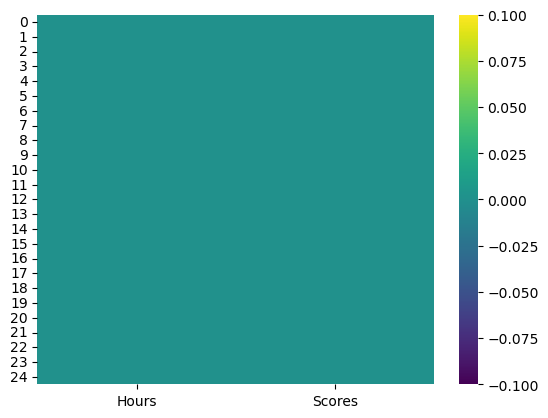

In [21]:
sns.heatmap(data.isnull(),cmap='viridis')

DATA VISUALISATION

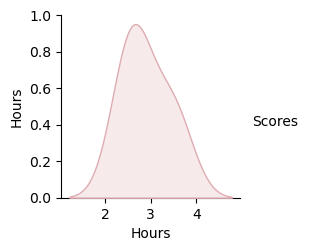

In [83]:
sns.pairplot(data,hue='Scores')
plt.show()

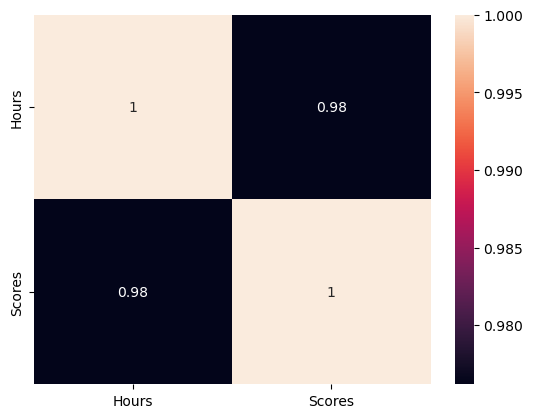

In [84]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

THE OUTLIERS

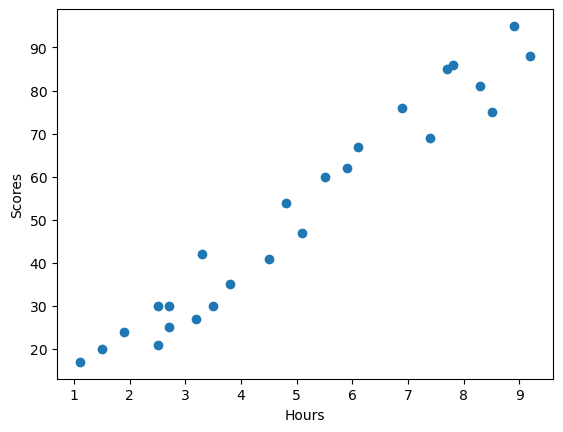

In [85]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<Axes: >

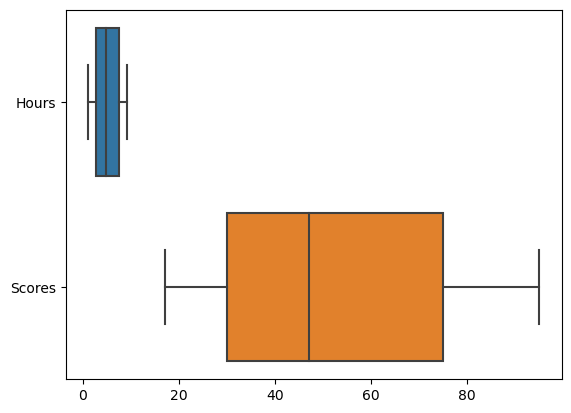

In [86]:
sns.boxplot(data=data[['Hours','Scores']],orient='h')

DATA DISTRIBUTION

C:\Users\nawre\AppData\Local\Temp\ipykernel_85556\3939742301.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Hours'], shade=True)


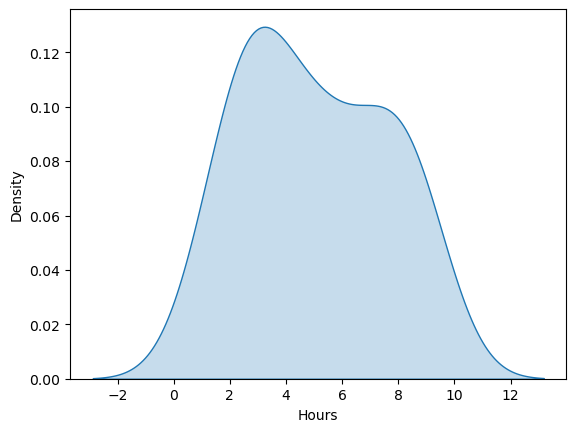

In [87]:
sns.kdeplot(data['Hours'], shade=True)
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

C:\Users\nawre\AppData\Local\Temp\ipykernel_85556\3151095844.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Scores'], shade=True)


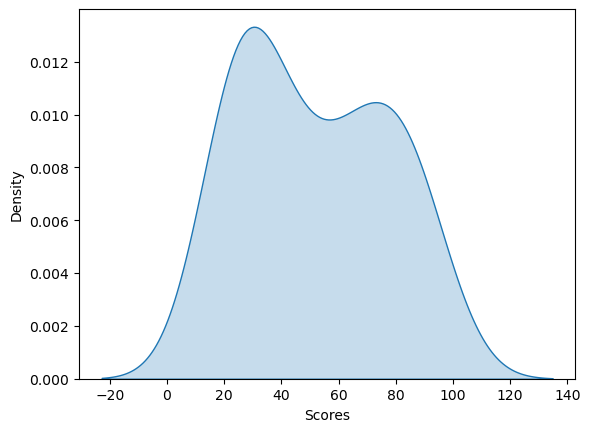

In [88]:
sns.kdeplot(data['Scores'], shade=True)
plt.xlabel('Scores')
plt.ylabel('Density')
plt.show()

DATA MODELLING


Split the data

In [91]:
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Print the size of the train and test sets
print("Train_set size: ",x_train.shape)
print("Test_set size: ",x_test.shape)

Train_set size:  (17, 1)
Test_set size:  (8, 1)


Train the model

In [94]:

# Create an instance of the SGDRegressor model
model = SGDRegressor(max_iter=1000,eta0=0.01)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the training data
y_pred = model.predict(x)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [9.8268786]
Intercept: [1.23907449]


Model Evaluation

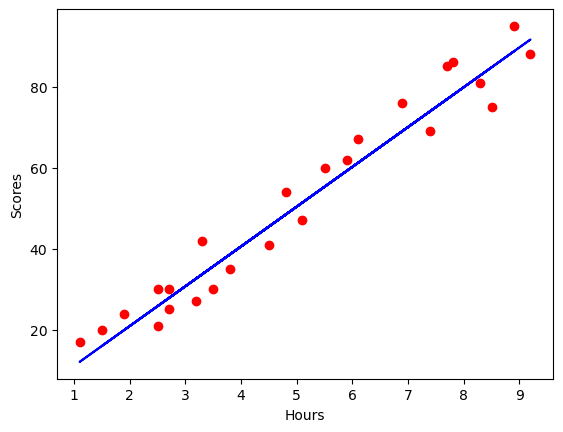

In [98]:
plt.scatter(x,y,c="r")
plt.plot(x,y_pred,c='b')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

ERROR METRICS

In [109]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('The R-square :',r2_score(y_test,y_pred))

Mean Absolute Error: 4.677760291200374
Mean Squared Error: 24.217569576290494
The R-square : 0.9544662166079323


PREDICTIONS

In [102]:
y_pred=model.predict(x_test)
print(y_pred)

# Compare the Scores in the dataset with the predicitons
compare = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
print(compare)

[15.97939238 32.68508599 73.95797609 25.80627098 59.2176582  38.58121315
 19.91014382 77.88872753]
   Actual  Predicted
0      20  15.979392
1      27  32.685086
2      69  73.957976
3      30  25.806271
4      62  59.217658
5      35  38.581213
6      24  19.910144
7      86  77.888728


What will be predicted score if a student studies for 9.25 hrs/day?

In [111]:
Hour=9.25
prediction = model.predict([[Hour]])
print("The predicted score for studying {:.2f} hours: {:.2f}".format(Hour, prediction[0]))

The predicted score for studying 9.25 hours: 92.14
